In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
adres = "/workspace/DeepLearningFundamentals/Dokumanlar/01_Preprocessing/data/diabetes.csv"
df = pd.read_csv(adres)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,3.847854,120.929779,69.109233,20.555267,79.695709,31.994668,0.472078,33.262679,0.349805
std,3.368280,31.966743,19.343483,15.950358,115.204894,7.879239,0.331160,11.768101,0.477219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


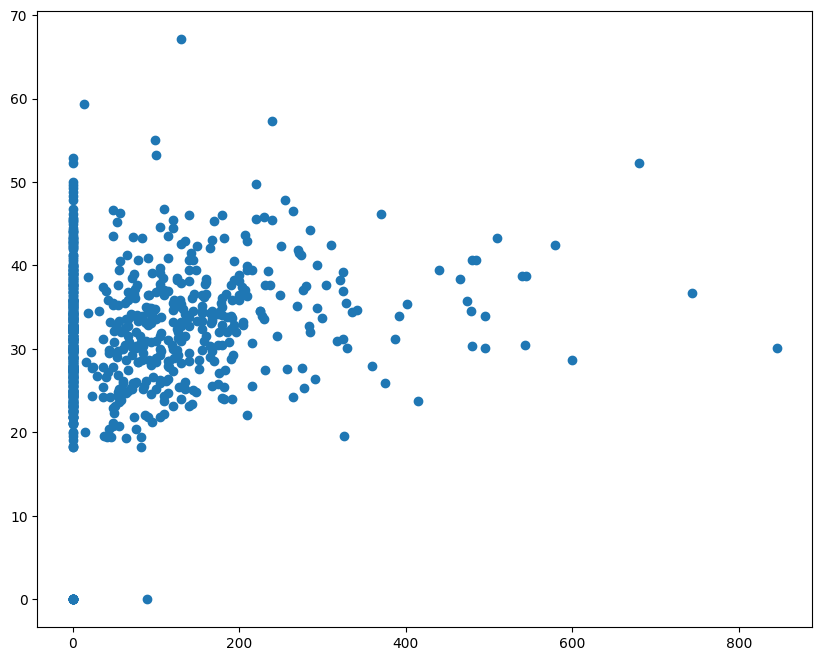

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(df["Insulin"],df["BMI"])

<Axes: >

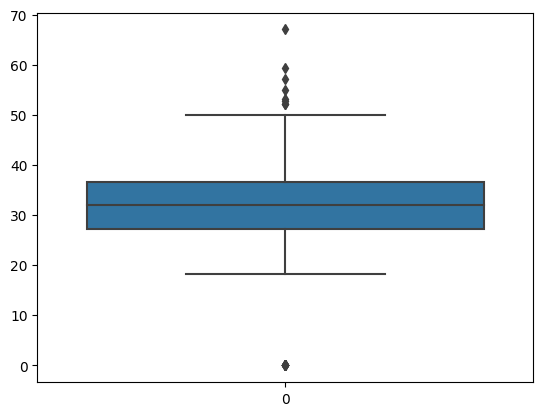

In [12]:
import seaborn as sns
sns.boxplot(df["BMI"])

In [14]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out,len(out),sep="\n")
iqr_outliers(df['BMI'])

Outliers:
[0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
19


In [16]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.1)
    q9 = df.quantile(0.9)
    for i in df:
        if i < q1 or i > q9:
            out.append(i)
    print("Outliers:",out,len(out),sep="\n")
iqr_outliers(df['BMI'])

Outliers:
[23.3, 43.1, 0.0, 45.8, 43.3, 23.2, 22.2, 19.9, 22.7, 45.4, 42.0, 0.0, 19.4, 23.0, 46.8, 0.0, 42.7, 19.6, 43.4, 43.2, 22.4, 0.0, 48.8, 19.1, 46.7, 20.4, 49.7, 22.5, 22.4, 23.2, 53.2, 55.0, 42.9, 21.1, 21.1, 0.0, 21.9, 47.9, 50.0, 44.2, 43.5, 67.1, 45.0, 23.2, 22.6, 52.3, 22.9, 20.4, 42.8, 42.6, 41.8, 45.2, 44.0, 46.2, 43.6, 44.1, 18.4, 52.3, 45.6, 23.0, 45.6, 20.8, 43.3, 21.9, 52.9, 21.0, 19.3, 23.5, 45.5, 23.1, 43.3, 47.9, 23.5, 21.8, 42.2, 42.7, 21.0, 0.0, 48.3, 43.4, 20.0, 22.3, 43.3, 45.7, 22.1, 21.1, 42.1, 21.9, 42.4, 42.4, 18.2, 45.3, 42.9, 0.0, 22.2, 42.4, 18.2, 59.4, 21.2, 19.6, 20.8, 21.8, 21.8, 46.1, 44.2, 42.3, 46.5, 0.0, 22.1, 19.6, 0.0, 21.8, 18.2, 45.3, 21.7, 43.6, 46.2, 22.6, 42.9, 42.1, 22.5, 21.1, 46.8, 45.3, 23.1, 19.5, 20.1, 43.5, 19.5, 23.4, 21.8, 42.9, 57.3, 49.6, 44.6, 0.0, 23.1, 46.1, 42.3, 23.5, 44.5, 0.0, 23.1, 22.9, 44.5, 23.3, 42.3, 49.3, 46.3, 43.3, 44.0, 22.5]
152


In [19]:
import numpy as np
out=[]
import scipy.stats as stats
stats.median_abs_deviation
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out,len(out),sep="\n")
ZRscore_outlier(df['BMI'])

Outliers:
[0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
17
